First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       ---------

<ipython-input-1-b99263f19c7d>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-1-b99263f19c7d>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

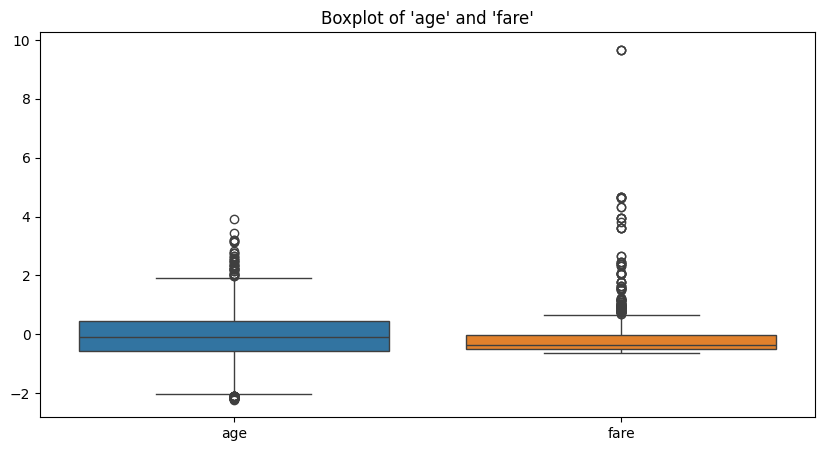


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    721 non-null    int64  
 1   pclass      721 non-null    int64  
 2   age         721 non-null    float64
 3   sibsp       721 non-null    int64  
 4   parch       721 non-null    int64  
 5   fare        721 non-null    float64
 6   alone       721 non-null    bool   
 7   sex_male    721 non-null    bool   
 8   embarked_Q  721 non-null    bool   
 9   embarked_S  721 non-null    bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 42.2 KB
None

Cleaned dataset saved as 'cleaned_titanic.csv'


In [1]:
# Titanic Data Cleaning & Preprocessing
# Author: [Your Name]

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Titanic dataset
df = sns.load_dataset('titanic')

# Step 3: Explore the dataset
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Step 4: Handle Missing Values
# Fill age with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill 'embarked' with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop 'deck' because it has too many missing values
df.drop(columns=['deck'], inplace=True)

# Drop rows with missing 'embark_town' and 'age' if any remain
df.dropna(inplace=True)

# Step 5: Encode Categorical Variables
# Drop unnecessary columns for simplicity
df.drop(columns=['alive', 'who', 'adult_male', 'class', 'embark_town'], inplace=True)

# One-hot encode 'sex' and 'embarked'
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Step 6: Normalize/Standardize Numerical Features
scaler = StandardScaler()
numeric_cols = ['age', 'fare']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 7: Visualize Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of 'age' and 'fare'")
plt.show()

# Step 8: Remove Outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Final Dataset Overview
print("\nCleaned Dataset Info:")
print(df.info())

# Step 9: Export Cleaned Dataset
df.to_csv('cleaned_titanic.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_titanic.csv'")


In [2]:
from google.colab import files
files.download('cleaned_titanic.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>